# MODELIZACIÓN PARA CLASIFICACIÓN

**IMPORTANTE**: Esta plantilla está diseñada para una visión de máximos utilizando el framework de The Ultimate Algo Machine. Si tienes problemas de memoria o rendimiento recuerda reducir el problema mediante:

* Muestreo
* Balanceo undersampling
* Reducir el número de algoritmos a testar
* Reducir el número de parámetros a testar
* Usar random search y especificar un n_iter adecuado

## IMPORTAR PAQUETES

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.pipeline import Pipeline

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report

from sklearn.metrics import plot_precision_recall_curve
import scikitplot as skplt
from yellowbrick.classifier import discrimination_threshold

#Autocompletar rápido
%config IPCompleter.greedy=True

#Desactivar la notación científica
pd.options.display.float_format = '{:.2f}'.format

#Desactivar los warnings
import warnings
warnings.filterwarnings("ignore")

C:\Users\eloic\miniconda3\envs\mant_predictivo\lib\site-packages\xgboost\compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


## IMPORTAR LOS DATOS

Sustituir la ruta del proyecto.

In [2]:
ruta_proyecto = 'C:/Users/eloic/Google Drive/EOI/TFM//01_MANT_PREDICTIVO'

Nombres de los ficheros de datos.

In [3]:
nombre_x = 'x_final.pickle'
nombre_y = 'y_final.pickle'

Cargar los datos.

In [4]:
x = pd.read_pickle(ruta_proyecto + '/02_Datos/03_Trabajo/' + nombre_x)
y = pd.read_pickle(ruta_proyecto + '/02_Datos/03_Trabajo/' + nombre_y)

## MODELIZAR

### Reservar el dataset de validacion

In [26]:
train_x,val_x,train_y,val_y = train_test_split(x,y,test_size=0.3)

### Crear el pipe y el diccionario de algorimos, parámetros y valores a testar

Modificar para dejar solo los algoritmos que se quieran testar.

Modificar los parámetros.

In [6]:
pipe = Pipeline([('algoritmo',RandomForestClassifier())])

grid = [
        {'algoritmo': [LogisticRegression()],
         'algoritmo__n_jobs': [-1],
         'algoritmo__solver': ['saga'],
         'algoritmo__penalty': ['elasticnet', 'l1', 'l2', 'none'],
         'algoritmo__C': [0,0.25,0.5,0.75,1]}
        
#         {'algoritmo': [RandomForestClassifier()],
#          'algoritmo__n_jobs': [-1],
#          'algoritmo__max_depth': [5,10,15],
#          'algoritmo__n_estimators': [50,100,200]}
        
#         {'algoritmo': [XGBClassifier()],
#          'algoritmo__n_jobs': [-1],
#          'algoritmo__verbosity': [0],#para que no salgan warnings
#          'algoritmo__learning_rate': [0.01,0.025,0.05,0.1],
#          'algoritmo__max_depth': [5,10,20],
#          'algoritmo__reg_alpha': [0,0.1,0.5,1],
#          'algoritmo__reg_lambda': [0.01,0.1,1],
#          'algoritmo__n_estimators': [100,500,1000]}
       ]

### Optimizar los hiper parámetros

Elegir si se quiere usar grid search o random search.

Comentar la opción que no se vaya a usar.

####  Con grid search

In [7]:
# grid_search = GridSearchCV(estimator= pipe, 
#                            param_grid = grid, 
#                            cv = 3, 
#                            scoring = 'roc_auc',
#                            verbose = 0,
#                            n_jobs = -1)

# modelo = grid_search.fit(train_x,train_y)

# pd.DataFrame(grid_search.cv_results_).sort_values(by = 'rank_test_score')

####  Con random search

In [10]:
random_search = RandomizedSearchCV(estimator = pipe,
                                   param_distributions = grid, 
                                   n_iter = 5, 
                                   cv = 3, 
                                   scoring = 'roc_auc', 
                                   verbose = 0,
                                   n_jobs = -1)

modelo = random_search.fit(train_x,train_y)

pd.DataFrame(random_search.cv_results_).sort_values(by = 'rank_test_score')

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_algoritmo__verbosity,param_algoritmo__reg_lambda,param_algoritmo__reg_alpha,param_algoritmo__n_jobs,param_algoritmo__n_estimators,param_algoritmo__max_depth,param_algoritmo__learning_rate,param_algoritmo,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
3,0.30,0.01,0.01,0.00,0,0.01,1,-1,100,5,0.10,"XGBClassifier(base_score=None, booster=None, c...","{'algoritmo__verbosity': 0, 'algoritmo__reg_la...",0.80,0.80,0.77,0.79,0.02,1
2,1.62,0.07,0.01,0.00,0,0.01,0,-1,500,5,0.03,"XGBClassifier(base_score=None, booster=None, c...","{'algoritmo__verbosity': 0, 'algoritmo__reg_la...",0.80,0.80,0.74,0.78,0.03,2
4,1.22,0.16,0.01,0.00,0,0.10,0.10,-1,500,5,0.01,"XGBClassifier(base_score=None, booster=None, c...","{'algoritmo__verbosity': 0, 'algoritmo__reg_la...",0.80,0.78,0.75,0.78,0.02,3
1,0.35,0.01,0.01,0.01,0,0.01,0.50,-1,100,20,0.10,"XGBClassifier(base_score=None, booster=None, c...","{'algoritmo__verbosity': 0, 'algoritmo__reg_la...",0.79,0.80,0.73,0.77,0.03,4
0,1.66,0.02,0.02,0.01,0,0.10,0.10,-1,500,20,0.10,"XGBClassifier(base_score=None, booster=None, c...","{'algoritmo__verbosity': 0, 'algoritmo__reg_la...",0.77,0.79,0.70,0.75,0.04,5


## EVALUAR

### Predecir sobre validación

In [27]:
pred = modelo.best_estimator_.predict_proba(val_x)[:, 1]

### Evaluar sobre validación

In [28]:
roc_auc_score(val_y, pred)

0.8336656186897733

### Examinar el mejor modelo

In [29]:
modelo.best_estimator_

Pipeline(steps=[('algoritmo',
                 XGBClassifier(base_score=0.5, booster='gbtree',
                               colsample_bylevel=1, colsample_bynode=1,
                               colsample_bytree=1, enable_categorical=False,
                               gamma=0, gpu_id=-1, importance_type=None,
                               interaction_constraints='', learning_rate=0.1,
                               max_delta_step=0, max_depth=5,
                               min_child_weight=1, missing=nan,
                               monotone_constraints='()', n_estimators=100,
                               n_jobs=-1, num_parallel_tree=1, predictor='auto',
                               random_state=0, reg_alpha=1, reg_lambda=0.01,
                               scale_pos_weight=1, subsample=1,
                               tree_method='exact', validate_parameters=1,
                               verbosity=0))])

## REPORTING DEL MODELO

### Gain Chart

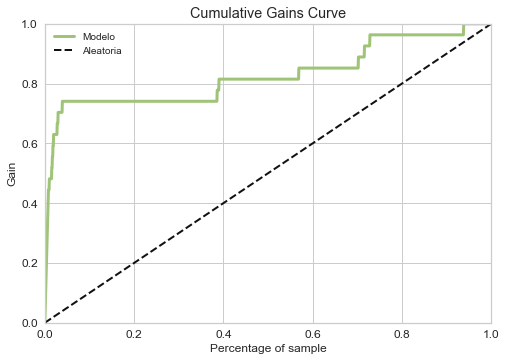

In [30]:
fig, ax = plt.subplots()

skplt.metrics.plot_cumulative_gain(val_y, modelo.best_estimator_.predict_proba(val_x), ax=ax) 

#Eliminamos la línea de los ceros y personalizamos la leyenda
del ax.lines[0]                 
plt.legend(labels = ['Modelo','Aleatoria']);

### Lift Chart

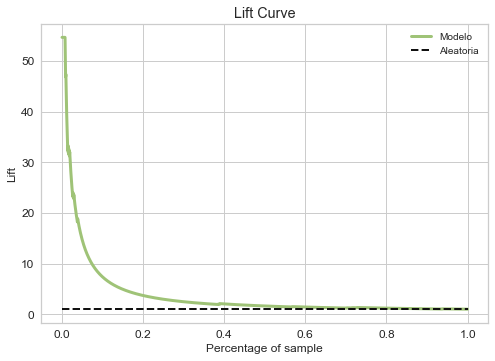

In [31]:
fig, ax = plt.subplots()

skplt.metrics.plot_lift_curve(val_y, modelo.best_estimator_.predict_proba(val_x), ax=ax) 

#Eliminamos la línea de los ceros y personalizamos la leyenda
del ax.lines[0]                 
plt.legend(labels = ['Modelo','Aleatoria']);

### ROC Chart

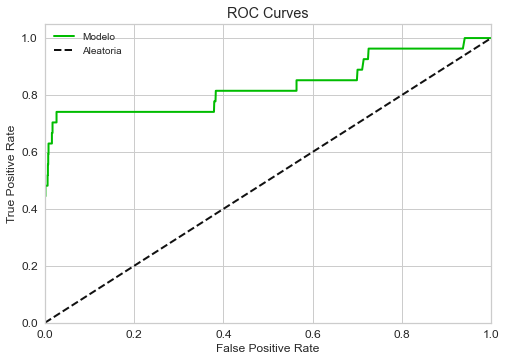

In [32]:
fig, ax = plt.subplots()

skplt.metrics.plot_roc(val_y, modelo.best_estimator_.predict_proba(val_x), ax=ax) 

#Eliminamos la línea de los ceros y personalizamos la leyenda
del ax.lines[0]                 
del ax.lines[1] 
del ax.lines[1]
plt.legend(labels = ['Modelo','Aleatoria']);